# RandomForests White Wine Classification

In [5]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Ready CSV 

In [6]:
df = pd.read_csv("./Resources/Data/winequality-white-clean.csv", delimiter=',')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,Fair
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,Fair
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,Fair
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,Fair
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
3952,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Fair
3953,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Fair
3954,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Fair
3955,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Very Good


# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)


(3957, 11) (3957,)


# Create a Train Test Split

--------
1
RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 1, Train/Test Score: 1.000/0.846
OOB_Score : 0.8201516793066089
--------
2
RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_jobs=-1,
                       oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 2, Train/Test Score: 0.995/0.852
OOB_Score : 0.825929938605995
--------
3
RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_jobs=-1,
                       oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 3, Train/Test Score: 0.971/0.849
OOB_Score : 0.8234019501625135
--------
4
RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_jobs=-1,
                       oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 4, Train/Test Score: 0.953/0.846
OOB_Score : 0.8208739617190322
--------
5
RandomForestClassifier(criterion='entropy', min_sampl

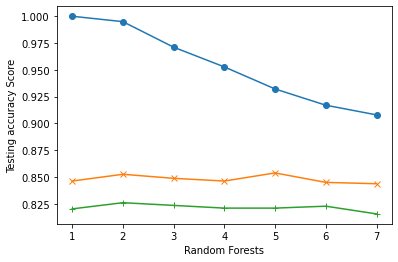

In [8]:
#Train your first model with default parameters
from sklearn.ensemble import RandomForestClassifier
train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='entropy')

    print("--------")
    print(k)
    print(rf)
    X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
    X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.332,random_state=3)

    print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{val_score:.3f}")
    #what is the percentage of accuracy
    #print(f"Accuracy of the train set : {rf.score(X_train, y_train)}")
    ##what is the percentage of accuracy for the validaton set
    #print(f"Accuracy of the validation set : {rf.score(X_val, y_val)}")
    #the score shows the percentage that are correct   
    
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

--------
1
RandomForestClassifier(n_jobs=-1, oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 1, Train/Test Score: 1.000/0.851
OOB_Score : 0.8266522210184182
--------
2
RandomForestClassifier(min_samples_leaf=2, n_jobs=-1, oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 2, Train/Test Score: 0.986/0.845
OOB_Score : 0.8244853737811484
--------
3
RandomForestClassifier(min_samples_leaf=3, n_jobs=-1, oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 3, Train/Test Score: 0.959/0.840
OOB_Score : 0.8205128205128205
--------
4
RandomForestClassifier(min_samples_leaf=4, n_jobs=-1, oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 4, Train/Test Score: 0.943/0.852
OOB_Score : 0.8230408089563019
--------
5
RandomForestClassifier(min_samples_leaf=5, n_jobs=-1, oob_score=True)
(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
k: 5, Train/Test Score: 0.927/0.846
OOB_Score : 0.8241242325749368
--------
6
Rand

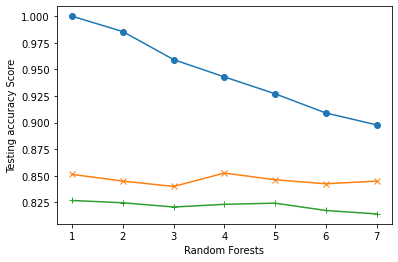

In [9]:
#Train your first model with default parameters
from sklearn.ensemble import RandomForestClassifier
train_scores = []
val_scores = []
oob_scores = []
for k in range(1, 8, 1):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=k,
                                n_jobs=-1,
                                oob_score=True,
                                criterion='gini')

    print("--------")
    print(k)
    print(rf)
    X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
    X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.332,random_state=3)

    print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
    rf = rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    oob_score = rf.oob_score_
    train_scores.append(train_score)
    val_scores.append(val_score)
    oob_scores.append(oob_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{val_score:.3f}")
    #what is the percentage of accuracy
    #print(f"Accuracy of the train set : {rf.score(X_train, y_train)}")
    ##what is the percentage of accuracy for the validaton set
    #print(f"Accuracy of the validation set : {rf.score(X_val, y_val)}")
    #the score shows the percentage that are correct   
    
    print(f"OOB_Score : {rf.oob_score_}")

plt.plot(range(1, 8, 1), train_scores, marker='o')
plt.plot(range(1, 8, 1), val_scores, marker="x")
plt.plot(range(1, 8, 1), oob_scores, marker="+")
plt.xlabel("Random Forests")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
rf = RandomForestClassifier(min_samples_leaf=4, n_jobs=-1, oob_score=True)
best_rf = rf
print(best_rf)
X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train_c, y_train_c)
print(f'Train and Validation Concat: {best_rf.score(X_train_c,y_train_c)}')
print(f'Validation set: {best_rf.score(X_val,y_val)}')
print(f'Final result: {best_rf.score(X_test,y_test)}')

RandomForestClassifier(min_samples_leaf=4, n_jobs=-1, oob_score=True)
Train and Validation Concat: 0.9359910162829871
Validation set: 0.9407313997477932
Final result: 0.8126582278481013


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'n_estimators':[100, 200],
              'min_samples_leaf':[1,2,3,4,5,6]}
             
                       
grid = GridSearchCV(rf, param_grid, verbose=3, return_train_score=True)


In [12]:
# Train the model with GridSearch
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.332,random_state=3)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
grid.fit(X_train, y_train)

(2769, 11) (793, 11) (395, 11) (2769,) (793,) (395,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.818) total time=   1.3s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.827) total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.827) total time=   0.1s
[CV 4/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.818) total time=   0.1s
[CV 5/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.848) total time=   0.1s
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.819) total time=   0.3s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.836) total time=   0.3s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_e

[CV 4/5] END criterion=entropy, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.825) total time=   0.3s
[CV 5/5] END criterion=entropy, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.839) total time=   0.3s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.818) total time=   0.2s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.829) total time=   0.1s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.993, test=0.827) total time=   0.1s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.992, test=0.825) total time=   0.1s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.995, test=0.839) total time=   0.1s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.993, test=0.809) total time=   0.3s
[CV 2/5] END criterion=e

GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=4, n_jobs=-1,
                                              oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=3)

In [13]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 200}
0.8288253765153641


In [14]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.363387,0.466665,0.015276,0.000399,gini,1,100,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.817690,0.826715,...,0.827382,0.011118,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.229182,0.004610,0.026489,0.000700,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.819495,0.835740,...,0.828825,0.010764,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.126402,0.004253,0.015200,0.000231,gini,2,100,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.814079,0.832130,...,0.825936,0.010346,10,0.981038,0.986907,0.985553,0.984650,0.985108,0.984651,0.001958
3,0.231975,0.002143,0.026330,0.000361,gini,2,200,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.814079,0.823105,...,0.823410,0.011161,14,0.984199,0.983747,0.986005,0.986456,0.986011,0.985283,0.001092
4,0.125319,0.001929,0.014786,0.000258,gini,3,100,"{'criterion': 'gini', 'min_samples_leaf': 3, '...",0.812274,0.830325,...,0.823410,0.013821,14,0.955756,0.958916,0.958465,0.961174,0.960289,0.958920,0.001853


In [15]:
#Now that  found my best parameters I combine train and val and I do it one more time

In [16]:
best_rf = grid.best_estimator_

print(best_rf)

best_rf.fit(X_train, y_train)
print(best_rf.score(X_train, y_train), best_rf.score(X_val, y_val))

X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)

best_rf.fit(X_train_c, y_train_c)
print(best_rf.score(X_train_c,y_train_c), best_rf.score(X_val,y_val))
print(f'Final result {best_rf.score(X_test,y_test)}')

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True)
1.0 0.8474148802017655
1.0 1.0
Final result 0.8227848101265823


In [27]:
predictions = best_rf.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
print(pred_act.Prediction.value_counts())
print(pred_act.Actual.value_counts())

Fair         346
Very Good     49
Name: Prediction, dtype: int64
Fair         316
Very Good     79
Name: Actual, dtype: int64


In [28]:
# Calculate classification report
y_names = ['Fair','Very Good']
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.86      0.94      0.89       316
   Very Good       0.59      0.37      0.45        79

    accuracy                           0.82       395
   macro avg       0.72      0.65      0.67       395
weighted avg       0.80      0.82      0.81       395



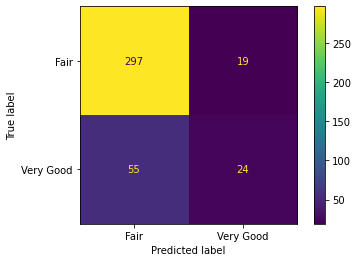

In [29]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(rf, X_test, y_test)  
plt.show() 

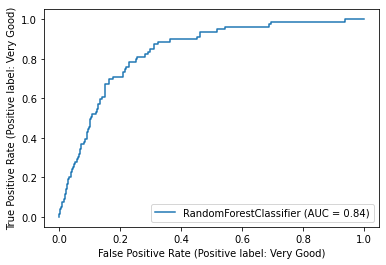

In [30]:
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.show()

[[296  20]
 [ 50  29]]
['Fair' 'Very Good']


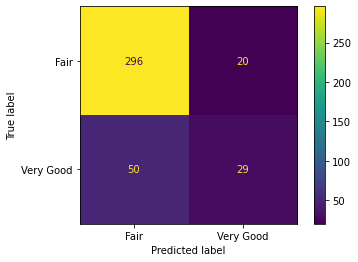

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf.classes_)
print(disp)
disp.plot() 
print(cm)
print(rf.classes_)
print(disp)
plt.show()

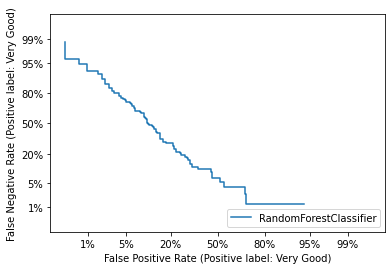

In [32]:
from sklearn import metrics
rf_disp = metrics.plot_det_curve(rf, X_test, y_test)  
plt.show()   

## Display features importance

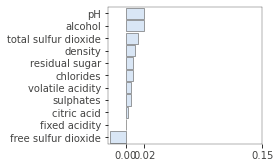

In [33]:
from rfpimp import *
imp = importances(best_rf, X_test, y_test, n_samples=-1)

viz = plot_importances(imp)
viz.view()

In [38]:
# Drop less import features
X = df.drop(['free sulfur dioxide','sulphates','citric acid', 'fixed acidity','quality'], axis = 1)
X


,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol
0,0.27,20.7,0.045,170.0,1.00100,3.00,8.8
1,0.30,1.6,0.049,132.0,0.99400,3.30,9.5
2,0.28,6.9,0.050,97.0,0.99510,3.26,10.1
3,0.23,8.5,0.058,186.0,0.99560,3.19,9.9
4,0.32,7.0,0.045,136.0,0.99490,3.18,9.6
...,...,...,...,...,...,...,...
3952,0.21,1.6,0.039,92.0,0.99114,3.27,11.2
3953,0.32,8.0,0.047,168.0,0.99490,3.15,9.6
3954,0.24,1.2,0.041,111.0,0.99254,2.99,9.4
3955,0.29,1.1,0.022,110.0,0.98869,3.34,12.8


In [39]:
y

0            Fair
1            Fair
2            Fair
3            Fair
4            Fair
          ...    
3952         Fair
3953         Fair
3954         Fair
3955    Very Good
3956         Fair
Name: quality, Length: 3957, dtype: object

In [40]:
X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.332,random_state=3)


In [42]:
best_rf = grid.best_estimator_

print(best_rf)

best_rf.fit(X_train, y_train)
print(best_rf.score(X_train, y_train), best_rf.score(X_val, y_val))

X_train_c = pd.concat([X_train, X_val], ignore_index=True)
y_train_c = pd.concat([y_train, y_val], ignore_index=True)

best_rf.fit(X_train_c, y_train_c)
print(best_rf.score(X_train_c,y_train_c), best_rf.score(X_val,y_val))
print(f'Final result {best_rf.score(X_test,y_test)}')

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True)
1.0 0.8297604035308953
1.0 1.0
Final result 0.8278481012658228
